# WiFi sensing experiment

Get to know about channel state information (CSI). [In wireless communications, channel state information (CSI) refers to known channel properties of a communication link. This information describes how a signal propagates from the transmitter to the receiver.](https://en.wikipedia.org/wiki/Channel_state_information) So, it can change raplidly as the wifi transmitter moves. Based on this characteristic, the CSI can be taken as the location fingerprint.

***Let's start our trip with CSI***

### A. Raw CSI data (10 points)

In this experiment, you will learn the constitution of CSI, including the Wi-Fi bandwidth, center frequency, the frequency of subcarriers, and so on. The data is stored in a h5 file. It can help you get to know more about CSI.

##### A.1. Read the CSI data (2 points)

You need to load the given data set, and see what indicators are collected, and what is the meaning of each indicator.

In [6]:
# import file-load tools

import h5py
import numpy as np

The dataset is provided with **Wi-Fi Indoor Localization Dataset (WILD-v2)**. 

In [3]:
# read h5 file, and print what the data set contains
wild = h5py.File('training_data_env1.h5', 'r')
for key in wild.keys():
    print(wild[key], key, wild[key].name)

<HDF5 dataset "AP_locs": shape (2, 4, 6), type "<f8"> AP_locs /AP_locs
<HDF5 group "/channels" (2 members)> channels /channels
<HDF5 dataset "labels": shape (2, 17276), type "<f8"> labels /labels
<HDF5 group "/opt" (6 members)> opt /opt
<HDF5 dataset "rssi": shape (6, 17276), type "<f8"> rssi /rssi


In [4]:
# Know more about the dataset
# AP_locs: the location of six APs and four antennas of each
ap_locs = np.array(wild["AP_locs"]).transpose(2,1,0)
print("the location of the first AP and its first antenna: ", ap_locs[0][0])

the location of the first AP and its first antenna:  [-4.50254934  2.0914558 ]


In [5]:
# LocationID: the location of receivers
for i in range(10):
    print(np.array(wild["labels"]).transpose(1,0)[i])

[  6.79897679 -14.17285318]
[ 6.29261672 -6.11530292]
[ 7.06926979 -0.13845123]
[ 7.17755559 -7.30487308]
[  6.18653808 -13.92644612]
[ 0.61334811 -1.95112597]
[-3.72435721  0.05757258]
[ 7.31815689 -7.97795294]
[6.28605751 0.53214268]
[ 7.13325368 -4.6592456 ]


In [6]:
# please look further for the data set and print the following items
# please fill in the code to print the extra information in the dataset

# YOUR CODE HERE
# /opt: a struct with multiple options on how data has been collected

# BW: bandwidth of the WiFi channel data collected for (Scalar)

# ANT_SEP: antenna separation on the APs (Scalar)

# CENTER_FREQ: Center frequency of the WiFi Tx-Rx (Scalar)

# CHAN: WiFi 11ac channel number used for WiFi Tx-Rx(Scalar)

# FREQ: Subcarrier frequencies used for WiFi Tx-Rx

# END OF YOUR CODE

The bandwidth of WiFi channel:  80000000.0 Hz
The antenna separation is:  0.0259
The center frequency is:  5210000000.0 Hz
WiFi channel number:  42.0
Subcarrier frequencies:  [[5.1718750e+09]
 [5.1721875e+09]
 [5.1725000e+09]
 [5.1728125e+09]
 [5.1731250e+09]
 [5.1734375e+09]
 [5.1737500e+09]
 [5.1740625e+09]
 [5.1743750e+09]
 [5.1746875e+09]
 [5.1750000e+09]
 [5.1753125e+09]
 [5.1756250e+09]
 [5.1759375e+09]
 [5.1762500e+09]
 [5.1765625e+09]
 [5.1768750e+09]
 [5.1771875e+09]
 [5.1775000e+09]
 [5.1781250e+09]
 [5.1784375e+09]
 [5.1787500e+09]
 [5.1790625e+09]
 [5.1793750e+09]
 [5.1796875e+09]
 [5.1800000e+09]
 [5.1803125e+09]
 [5.1806250e+09]
 [5.1809375e+09]
 [5.1812500e+09]
 [5.1815625e+09]
 [5.1818750e+09]
 [5.1821875e+09]
 [5.1825000e+09]
 [5.1828125e+09]
 [5.1831250e+09]
 [5.1834375e+09]
 [5.1837500e+09]
 [5.1840625e+09]
 [5.1843750e+09]
 [5.1846875e+09]
 [5.1850000e+09]
 [5.1853125e+09]
 [5.1856250e+09]
 [5.1859375e+09]
 [5.1862500e+09]
 [5.1868750e+09]
 [5.1871875e+09]
 [5.18750

##### A.2. Combine CSI data (3 points)

The CSI data contains two parts, which are real part and imaginary part. You need to combine them.

In [8]:
# get useful CSI information: AP1 and its first antennas

channel = wild["/channels"]

imag = np.array(channel["imag"])
real = np.array(channel["real"])
print("The shape of imag or real part is: ", np.shape(imag))

imag = imag.transpose(0,1,3,2)
real = real.transpose(0,1,3,2)
print("The transposed shape of imag or real part is: ", np.shape(imag))

# extract information from AP1 and its first antenna
imag1 = imag[0][0]
real1 = real[0][0]
# combine the imag and real part together
antenna_1 = []
for i in range(len(imag1)):
    antenna_1.append(np.add(real1[i], 1j*imag1[i]))

The shape of imag or real part is:  (6, 4, 234, 17276)
The transposed shape of imag or real part is:  (6, 4, 17276, 234)


##### A.3. Visualize CSI data (5 points)

You need to visualize the CSI data, including the amplitude and phase.

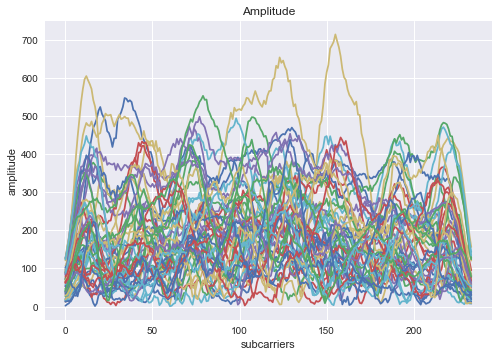

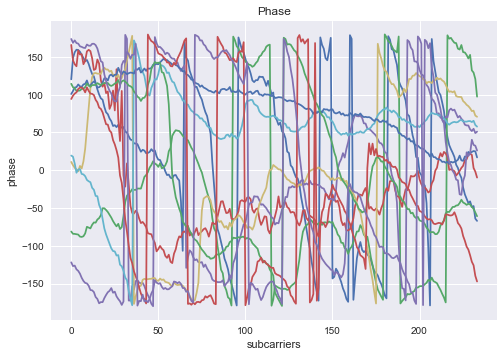

In [9]:
# YOUR CODE HERE
# print amplitude and phase

# select the first 20 CSI data to draw the picture

# print amplitude

# print phase

# END OF YOUR CODE

### B. TRRS calculation (20 points)

TRRS is an application of "time reversal focusing effect". Suppose the station receives two CSI data (in channel frequency response mode, CFR) from the AP, that is $H_1$ and $H_2$, seperately. The TRRS value of these two CSI vecotr can be calculated by the following equation:
$$ trrs=\frac{\left|{H_1}^{\rm{T}} H_2^*\right|^2}{\langle H_1,H_1 \rangle\langle H_2,H_2 \rangle} $$
where the symbol $*$ represents the conjugate operation.

##### B.1. Calculate TRRS from the dataset in the first part (10 points)

In [71]:
# function to calculate TRRS
from cmath import pi
import math

def trrs(h1, h2):
    # please complete the founction to calculate TRRS with the given formula
    # YOUR CODE HERE

    # END OF YOUR CODE
    return output

# the sanitization function is given to eliminate the phase offset
def sanitization(x):
    F = len(x)
    phase = np.angle(x)
    phase = np.unwrap(phase)
    a = (phase[-1]-phase[0])/(2*pi*F)
    b = sum(phase)/F

    firstpart = (np.arange(F)+1)*a
    secondpart = np.ones(F)*b
    phase = phase - firstpart - secondpart

    return x * np.exp(1j*phase)

As you have known how to calculate the TRRS between two CSI datas, please try to calculate the TRRS value between any two CSI datas and draw a TRRS matrix graph.

/var/folders/hr/l8ctjl7j5xq6mdkgl55c1qh80000gn/T/ipykernel_98774/1478275837.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


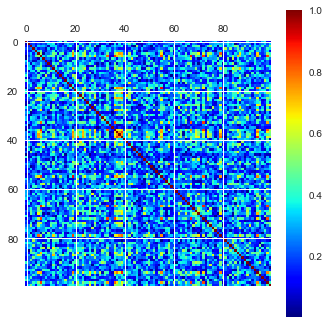

In [11]:
# YOUR CODE HERE
# print TRRS matrix of CSI from the first part
# how to use sanitization function: trrs(sanitization(h1), sanitization(h2))

# END OF YOUR CODE

##### B.2. Calculate the TRRS value matrix of a static location (10 points)

In the following experiment, we will calculate the TRRS of CSI data collected from the same place. According to the theory, all the TRRS value shoud be almost 1. The CSI data were collected from ESP32, that no **preprocessing** is required.

In [12]:
# import the mat file

import scipy.io as scio

filepath = 'static_csi.mat'
static_csi = scio.loadmat(filepath)['csi_data']

/var/folders/hr/l8ctjl7j5xq6mdkgl55c1qh80000gn/T/ipykernel_98774/1853227708.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


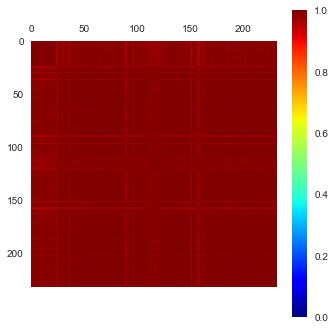

In [14]:
# YOUR CODE HERE
# print TRRS matrix of CSI data from the static location

# END OF YOUR CODE

### C. Cloest location (20 points)

The TRRS function can be used to track moving robot. We will give you a dataset, which contains the robot moving trajectory, along with the position labels, and the corresponding CSI data. And our question is: can we use TRRS to find the closest position of a given location.

##### C.1. Visualize the robot moving trajectory (5 points)

The robot moving trajectory, and the positions of routers are given. You need to visualize them.

In [3]:
# DLoC dataset

# here we combine two datasets together
dloc = h5py.File('channels_jacobs_July28.mat', 'r')
dloc1 = h5py.File('channels_jacobs_July28_2.mat', 'r')
for key in dloc.keys():
    print(dloc[key], key, dloc[key].name)

<HDF5 group "/#refs#" (5 members)> #refs# /#refs#
<HDF5 dataset "RSSI": shape (4, 11440), type "<i8"> RSSI /RSSI
<HDF5 dataset "ap": shape (4, 1), type "|O"> ap /ap
<HDF5 dataset "ap_aoa": shape (4, 1), type "<f8"> ap_aoa /ap_aoa
<HDF5 dataset "channels": shape (4, 4, 234, 11440), type "|V16"> channels /channels
<HDF5 dataset "labels": shape (2, 11440), type "<f8"> labels /labels
<HDF5 group "/opt" (4 members)> opt /opt
<HDF5 dataset "timestamps": shape (1, 11440), type "<f8"> timestamps /timestamps
<HDF5 dataset "xLabels": shape (361, 1), type "<f8"> xLabels /xLabels
<HDF5 dataset "yLabels": shape (161, 1), type "<f8"> yLabels /yLabels


In [23]:
# extract AP locations from two datasets
ap = dloc['ap']
ap = np.array(ap)

ap_location = []
for i in range(len(ap)):
    ap_location.append(dloc[ap[i][0]])
ap_location = np.array(ap_location).transpose(0 ,2, 1)

ap_1 = dloc1['ap']
ap_1 = np.array(ap_1)

ap_location_1 = []
for i in range(len(ap_1)):
    ap_location_1.append(dloc1[ap_1[i][0]])
ap_location_1 = np.array(ap_location_1).transpose(0 ,2, 1)
# combine two datasets
ap_location = np.concatenate((ap_location, ap_location_1), axis=0)

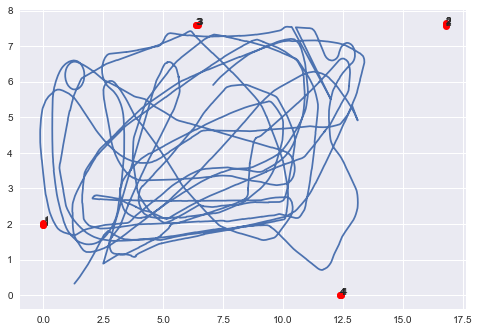

In [26]:
# extract the moving location
location_list = np.concatenate((np.array(dloc["labels"]).transpose(1,0), np.array(dloc1["labels"]).transpose(1,0)), axis=0)

# YOUR CODE HERE
# show the moving trajectory and AP locations

# END OF YOUR CODE

##### C.2. Find the closest location (10 points)

Can we use TRRS to find the closest position of a given location. Calculate the TRRS of one (query) location X against all others, find the one that produces the max TRRS and pick it as the correct location, denoted as X'; Calculate the location distance (X, X'). Do this for some locations/samples in the dataset and produce the CDF plot. (It should be noticed that the CSI data in the given dataset is not good enough, so the CDF result may not be good.)

In [36]:
# extract CSI data from two datasets and combine them together
# you just need the CSI data from AP1 and its first antenna
dloc_channels = np.concatenate((np.array(dloc["channels"]).transpose(0, 1, 3, 2)[0][0], np.array(dloc1["channels"]).transpose(0, 1, 3, 2)[0][0]), axis=0)
dloc_channels = np.array(dloc_channels.view('complex'))

timestamp = np.append(dloc["timestamps"][0], dloc1["timestamps"][0])

final_dloc = []
fianl_timestamp = []
final_location = []

for i in range(len(dloc_channels)):
    if i != 0:
        if timestamp[i] != timestamp[i-1]:
            final_dloc = np.append(final_dloc, dloc_channels[i].reshape(1,234), axis=0)
            final_timestamp = np.append(final_timestamp, timestamp[i])
            final_location = np.append(final_location, location_list[i].reshape(1,2), axis=0)
        else:
                final_dloc = dloc_channels[0].reshape(1,234)
                final_timestamp = timestamp[0]
                final_location = location_list[0].reshape(1,2)

# you can also check the timestamps of the CSI data and eliminate the data with the same timestamp

In [43]:
# calculate the location error for 500 random positions and print the CDF of location error
def distance(x, y):
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

# select 500 random nodes
np.random.seed(100)
randomnodes = np.random.randint(len(final_dloc), size=(500))

def location_error(randomnodes, final_dloc):
    # please fill in the code to calculate the location error
    # YOUR CODE HERE
    error_list = []

    # END OF YOUR CODE
    return error_list

error_list = location_error(randomnodes, final_dloc)

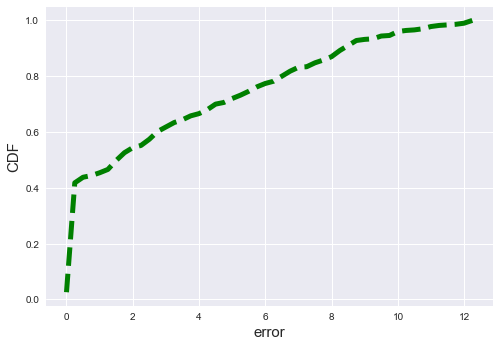

In [44]:
# YOUR CODE HERE
# plot the CDF of location error

# END OF YOUR CODE

##### C.3. Calculate the moving speed (5 points)

With the given location labels and timestamps, you can calculate the moving speed of the robot.

In [45]:
# YOUR CODE HERE
# timestamps are in milliseconds
# calculate the average speed within adjacent two timestamps

# END OF YOUR CODE

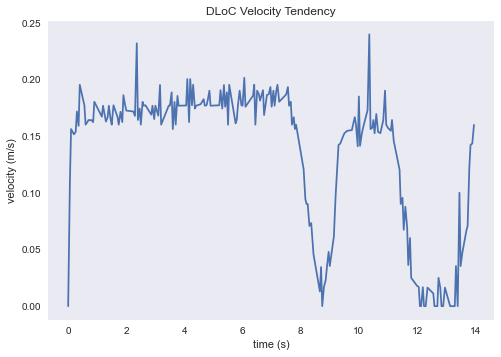

In [46]:
# YOUR CODE HERE
# print the velocity tendency

# END OF YOUR CODE

### D. RF-based inertial measurement (30 points)

In this section, we will turn a commodity WiFi device into an Inertial Measurement Unit (IMU) that can accurately track moving distance, heading direction, and rotating angle, requiring no additional infrastructure.

##### D.1 Data Presentation and Preparation (0 points)
In this section, you will get to know the data format of the dataset.

In [45]:
# read mat file, and print what the data set contains
import h5py
rim = h5py.File('/Users/tonystark/Documents/Personal Document/PhD first year/Projects/relocalization/trrs_code/rim.mat')['csi_trace']

In [75]:
print(rim.keys())
print("In the dataset, we have three receivers, and three trasmitters, and the sampling rate is 1500Hz")

<KeysViewHDF5 ['Nrx', 'Ntx', 'bfee_count', 'csi', 'freq', 'mactimer', 'rate', 'rssi', 'system_timer']>
In the dataset, we have three receivers, and three trasmitters, and the sampling rate is 1500Hz


In [77]:
# get the timestamp of the CSI data
rim_time = np.array(rim['mactimer']).transpose(1,0)[0]
rim_time -= rim_time[0]
rim_time *= 10**(-4)
# get the CSI data
rim_csi = rim['csi']
rim_csi = np.array(rim_csi).view('complex').transpose(2, 0, 3, 1)
print("the shape of rim_csi is ", rim_csi.shape)
print("the first dimension represents receivers, and the third dimension represents transmitters")

the shape of rim_csi is  (3, 19285, 3, 30)
the first dimension represents receivers, and the third dimension represents transmitters


In [87]:
# as the sampling frequency in this dataset is 1500Hz, we need to downsample the CSI data to 100Hz
from tqdm import tqdm

downsample = np.linspace(0, len(rim_csi[0])-1, len(rim_csi[0])//15, dtype=int)
antenna1 = rim_csi[0]
antenna1_down = antenna1[downsample,:,:]

antenna2 = rim_csi[1]
antenna2_down = antenna2[downsample,:,:]
antenna3 = rim_csi[2]
antenna3_down = antenna3[downsample,:,:]

for i in tqdm(range(len(antenna1))):
    for j in range(len(antenna1[0])):
        antenna1[i][j] = sanitization(antenna1[i][j])
        antenna2[i][j] = sanitization(antenna2[i][j])
        antenna3[i][j] = sanitization(antenna3[i][j])

for i in tqdm(range(len(antenna1_down))):
    for j in range(len(antenna1_down[0])):
        antenna1_down[i][j] = sanitization(antenna1_down[i][j])
        antenna2_down[i][j] = sanitization(antenna2_down[i][j])
        antenna3_down[i][j] = sanitization(antenna3_down[i][j])

100%|██████████| 1285/1285 [00:00<00:00, 2672.41it/s]


##### D.2. Functions of RF-based inertial measurement (10 points)

You need to fill in the functions of RF-based inertial measurement according to the given formulas and related paper.

The first formula is the improved version of single antenna TRRS, which is introduced above. However, to enhance the tracking accuracy, we need to use full of three transmitters, that is, for one receiver, we have three CSI datas. More general, suppose there are $N$ transmitters. The CSI measured on the $i$th receiver at time $t$ is $H_i(t)=\{H_{i,1}(t),H_{i,2}(t),...,H_{i,N}(t)\}$, where $H_{i,k}(t)$ is the CSI between the $i$ th receive antenna and the $k$ th transmit antenna. We then take the average TRRS of the $i$ th and $j$ th receive antenna as:
$$
\bar\kappa\left(H_i(t_i),H_j(t_j)\right)=\frac{1}{N}\sum_{k=1}^{N}\kappa\left(H_{i,k}(t_i),H_{j,k}(t_j)\right)
$$

In [96]:
# rim trrs function
def rim_trrs(h1, h2):
    # please fill in the function based on the above formula
    # YOUR CODE HERE

    # END OF YOUR CODE
    return kappa

To boost super-resolution alignment, we propose to leverage a number of virtual antennas emulated by the sequence of channel snapshots recorded by a moving antenna, forming a virtual massive antenna array. We extend the multipath profile of an antenna $i$ at time $t$ from a single snapshot $H_i(t)$ to a sequence of samples $P_i(t)=[H_i(t+k),k=-V/2,...,V/2]$, where $H_i(t+k)$ indicates the channel measurement emulating the virtual antenna set up by antenna $i$ at time $t+k$, and $V$ is the number of virtual antennas.

Accordingly, we calculate the TRRS with $V$ Virtual massive antennas as:
$$
\kappa(P_i(t_i),P_j(t_j))=\frac{1}{V}\sum_{k=-V/2}^{V/2}\bar\kappa(H_i(t_i+k),H_j(t_j+k))
$$
where $H_i(t_i-k)$ and $H_j(t_j-k)$ denote the respective virtual antenna placed at certain space location by the $i$ th and $j$ th antenna at time $t_i-k$ and $t_j-k$. By using the virtual massive antennas, we largely boost the effective bandwidth of the multipath profile and thus enhance the time-reversal focusing effect.

In [97]:
# virtual mass antenna TRRS
def trrs_virtual(P1, P2):
	# please complete the function to calculate virtual TRRS with the above formula
	# YOUR CODE HERE

	# END OF YOUR CODE
	return kappa_virtual

##### D.3. Calculate the antenna alignment matrix (10 points)

Based on the functions, you need to calculate the antenna alignment matrix, which can tell the relative position between two antennas.

In this part, we need to calculate the antenna alignment matrix among three receivers.

In [98]:
# we only need the first 600 timestamps to calculate the matrix
# as the receivers were stoped after that time

antenna_1_2 = np.zeros((600, 100))
antenna_1_3 = np.zeros((600, 100))
antenna_2_3 = np.zeros((600, 100))
# virtual antenna numbers
V = 20

for i in tqdm(range(600)):
	for j in range(100):
		antenna_1_2[i, j] = trrs_virtual(antenna1_down[60+i-V//2:60+i+V//2], antenna2_down[60+i+50-j-V//2:60+i+50-j+V//2])
		antenna_1_3[i, j] = trrs_virtual(antenna1_down[60+i-V//2:60+i+V//2], antenna3_down[60+i+50-j-V//2:60+i+50-j+V//2])
		antenna_2_3[i, j] = trrs_virtual(antenna2_down[60+i-V//2:60+i+V//2], antenna3_down[60+i+50-j-V//2:60+i+50-j+V//2])

100%|██████████| 600/600 [02:39<00:00,  3.77it/s]


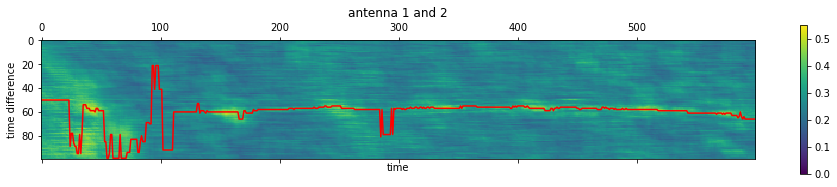

In [99]:
# please draw the heatmap of the three virtual TRRS matrices

# find the peak value in each column of the matrix and plot out the coordinates
# please note that the peak detection in each column maybe in the center, which is not the real peak
# you can correct the peak detection by using the adjacent values
# after you obtain the peak coordinates, you need to plot them out on the heatmap

# YOUR CODE HERE

# END OF YOUR CODE

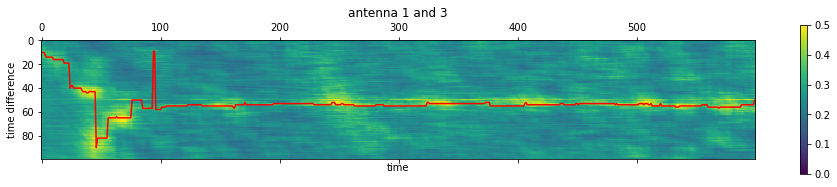

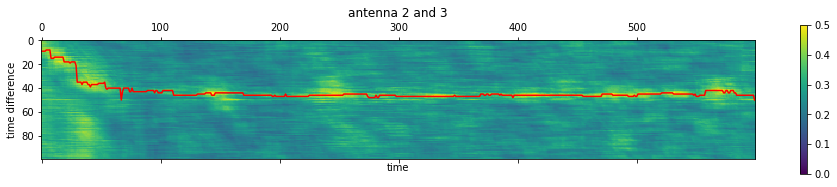

##### 4. Position Detection (10 points)

With the alignment matrix, you can know the relative position of these transmitters.

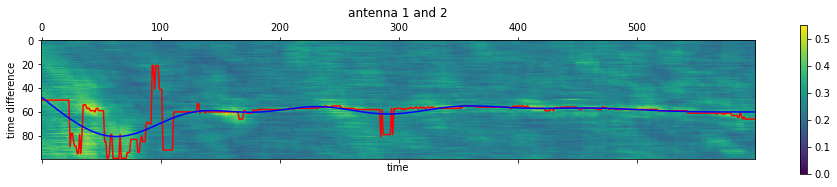

In [105]:
# you can use butterworth filter to filter the peak detection results
# the following picture is an example of the filtered peak detection results (the blue line)

# YOUR CODE HERE

# END OF YOUR CODE

Text(0, 0.5, 'time (s)')

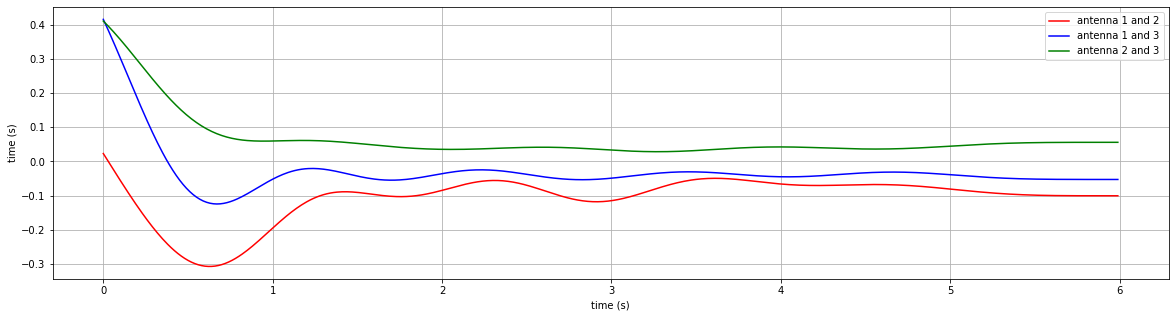

In [108]:
# YOUR CODE HERE
# you need to print the peak detection results with correct time labels

# END OF YOUR CODE

With the peak detection results, you can tell the relative position of these three receivers, supppose the moving direction of the receiver is from left to right.

Please fill in the results in the following table with the number of each antenna.

|   Left   |   Middle   |   Right   |
| ---- | :--: | ---- |
|      |      |      |



**The above four experiments are fundamental and must be done by all of you. If you are not able to handle the extend experiment, which is the fourth part, it's OK to just finish four of them. And you will get almost 80 points if you do a good job.**

### E. Extend experiment (10 points)

In the third part, you can find that it is unstable to track the closest position (relocalize) by using TRRS only. To improve the performance, you can try to use the CSI data collected from other antennas or even other APs. You are also encouraged to use some state-of-the-art methodologies to handle the CSI information, such as machine learning, or deep learning. And then we can judge how much further your algorithm can achieve. It should be noticed that this part will be graded in terms of experimental completness and accuracy, as well as the cross-sectional comparison with other groups.
The refereced dataset link is: https://www.kaggle.com/competitions/wild-v2/overview, which consists of the training datasets and the test datasets.